<a href="https://colab.research.google.com/github/imjyong/CS/blob/main/practice/Boston_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **데이터셋**

- Boston House Prices

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS book/혼자 공부하는 머신러닝+딥러닝/data/house_price.csv")

In [ ]:
print(df.shape)

(506, 15)


### **선형 회귀**

#### **데이터 분석**

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [ ]:
df.loc[df['AGE'] >= 40]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    int64  
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 59.4 KB


In [ ]:
df['AGE'] = df['AGE'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    int64  
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 59.4 KB


In [ ]:
df.loc[(df['AGE'] >= 20) & (df['AGE'] <= 39)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
12,0.09378,12.5,7.87,0,0.524,5.889,39,5.4509,5,311,15.2,390.50,15.71,21.7,0
16,1.05393,0.0,8.14,0,0.538,5.935,29,4.4986,4,307,21.0,386.85,6.58,23.1,0
18,0.80271,0.0,8.14,0,0.538,5.456,36,3.7965,4,307,21.0,288.99,11.69,20.2,0
38,0.17505,0.0,5.96,0,0.499,5.966,30,3.8473,5,279,19.2,393.43,10.13,24.7,0
39,0.02763,75.0,2.95,0,0.428,6.595,21,5.4011,3,252,18.3,395.63,4.32,30.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,40.0,1.25,0,0.429,6.939,34,8.7921,1,335,19.7,389.85,5.89,26.6,0
351,0.07950,60.0,1.69,0,0.411,6.579,35,10.7103,4,411,18.3,370.78,5.49,24.1,0
353,0.01709,90.0,2.02,0,0.410,6.728,36,12.1265,5,187,17.0,384.46,4.50,30.1,1
354,0.04301,80.0,1.91,0,0.413,5.663,21,10.5857,4,334,22.0,382.80,8.05,18.2,0


In [ ]:
def age_group(age):
    if age < 10:
        return '0대'
    elif age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    else:
        return '60대 이상'

df['AGE_GROUP'] = df['AGE'].apply(age_group)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV,AGE_GROUP
0,0.00632,18.0,2.31,0,0.538,6.575,65,4.0900,1,296,15.3,396.90,4.98,24.0,0,60대 이상
1,0.02731,0.0,7.07,0,0.469,6.421,78,4.9671,2,242,17.8,396.90,9.14,21.6,0,60대 이상
2,0.02729,0.0,7.07,0,0.469,7.185,61,4.9671,2,242,17.8,392.83,4.03,34.7,1,60대 이상
3,0.03237,0.0,2.18,0,0.458,6.998,45,6.0622,3,222,18.7,394.63,2.94,33.4,1,40대
4,0.06905,0.0,2.18,0,0.458,7.147,54,6.0622,3,222,18.7,396.90,5.33,36.2,1,50대


In [ ]:
df.loc[(df['TAX'] >= 200) & (df['TAX'] <= 300)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV,AGE_GROUP
0,0.00632,18.0,2.31,0,0.538,6.575,65,4.0900,1,296,15.3,396.90,4.98,24.0,0,60대 이상
1,0.02731,0.0,7.07,0,0.469,6.421,78,4.9671,2,242,17.8,396.90,9.14,21.6,0,60대 이상
2,0.02729,0.0,7.07,0,0.469,7.185,61,4.9671,2,242,17.8,392.83,4.03,34.7,1,60대 이상
3,0.03237,0.0,2.18,0,0.458,6.998,45,6.0622,3,222,18.7,394.63,2.94,33.4,1,40대
4,0.06905,0.0,2.18,0,0.458,7.147,54,6.0622,3,222,18.7,396.90,5.33,36.2,1,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69,2.4786,1,273,21.0,391.99,9.67,22.4,0,60대 이상
502,0.04527,0.0,11.93,0,0.573,6.120,76,2.2875,1,273,21.0,396.90,9.08,20.6,0,60대 이상
503,0.06076,0.0,11.93,0,0.573,6.976,91,2.1675,1,273,21.0,396.90,5.64,23.9,0,60대 이상
504,0.10959,0.0,11.93,0,0.573,6.794,89,2.3889,1,273,21.0,393.45,6.48,22.0,0,60대 이상


In [ ]:
df.sort_values(by=['MEDV', 'RM'], ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV,AGE_GROUP
225,0.52693,0.0,6.20,0,0.5040,8.725,83,2.8944,8,307,17.4,382.00,4.63,50.0,1,60대 이상
257,0.61154,20.0,3.97,0,0.6470,8.704,86,1.8010,5,264,13.0,389.70,5.12,50.0,1,60대 이상
163,1.51902,0.0,19.58,1,0.6050,8.375,93,2.1620,5,403,14.7,388.45,3.32,50.0,1,60대 이상
267,0.57834,20.0,3.97,0,0.5750,8.297,67,2.4216,5,264,13.0,384.54,7.44,50.0,1,60대 이상
204,0.02009,95.0,2.68,0,0.4161,8.034,31,5.1180,4,224,14.7,390.55,2.88,50.0,1,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,45.74610,0.0,18.10,0,0.6930,4.519,100,1.6582,24,666,20.2,88.27,36.98,7.0,0,60대 이상
399,9.91655,0.0,18.10,0,0.6930,5.852,77,1.5004,24,666,20.2,338.16,29.97,6.3,0,60대 이상
400,25.04610,0.0,18.10,0,0.6930,5.987,100,1.5888,24,666,20.2,396.90,26.77,5.6,0,60대 이상
405,67.92080,0.0,18.10,0,0.6930,5.683,100,1.4254,24,666,20.2,384.97,22.98,5.0,0,60대 이상


In [ ]:
# 집 값 별 평균 연령

pivot = df.pivot_table(
    values='AGE',
    index='MEDV',
    columns='AGE_GROUP',
    aggfunc='mean'
)

In [ ]:
pivot

AGE_GROUP,0대,10대,20대,30대,40대,50대,60대 이상
MEDV,,,,,,,
5.0,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
5.6,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
6.3,NaN,NaN,NaN,NaN,NaN,NaN,77.000000
7.0,NaN,NaN,NaN,NaN,NaN,NaN,99.000000
7.2,NaN,NaN,NaN,NaN,NaN,NaN,99.333333
...,...,...,...,...,...,...,...
46.7,NaN,17.0,NaN,NaN,NaN,NaN,NaN
48.3,NaN,NaN,NaN,NaN,NaN,NaN,70.000000
48.5,NaN,NaN,NaN,33.0,NaN,NaN,NaN


In [ ]:
df.loc[df['RM'] < 6]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV,AGE_GROUP
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5,0,60대 이상
12,0.09378,12.5,7.87,0,0.524,5.889,39,5.4509,5,311,15.2,390.50,15.71,21.7,0,30대
13,0.62976,0.0,8.14,0,0.538,5.949,61,4.7075,4,307,21.0,396.90,8.26,20.4,0,60대 이상
15,0.62739,0.0,8.14,0,0.538,5.834,56,4.4986,4,307,21.0,395.62,8.47,19.9,0,50대
16,1.05393,0.0,8.14,0,0.538,5.935,29,4.4986,4,307,21.0,386.85,6.58,23.1,0,20대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.27957,0.0,9.69,0,0.585,5.926,42,2.3817,6,391,19.2,396.90,13.59,24.5,0,40대
495,0.17899,0.0,9.69,0,0.585,5.670,28,2.7986,6,391,19.2,393.29,17.60,23.1,0,20대
496,0.28960,0.0,9.69,0,0.585,5.390,72,2.7986,6,391,19.2,396.90,21.14,19.7,0,60대 이상
497,0.26838,0.0,9.69,0,0.585,5.794,70,2.8927,6,391,19.2,396.90,14.10,18.3,0,60대 이상


In [ ]:
# 상관계수
# 현재 MEDV & RM 의 상관관계가 가장 높음

df = df.drop(columns=['AGE_GROUP']) # 문자열 컬럼 drop

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.353722,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569667,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644672,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086118,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731551,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.241191,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.353722,-0.569667,0.644672,0.086118,0.731551,-0.241191,1.000000,-0.747648,0.456475,0.506716,0.261051,-0.273849,0.603038,-0.377217,-0.191736
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747648,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456475,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506716,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


#### **이상치 제거**

In [ ]:
# Q1, Q3, IQR 계산
q1 = df['RM'].quantile(0.25)
q3 = df['RM'].quantile(0.75)
iqr = q3 - q1

# 이상치 경계 설정
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 제거
df_no_outliers = df[(df['RM'] >= lower_bound) & (df['RM'] <= upper_bound)]

print("제거 전:", df.shape)
print("제거 후:", df_no_outliers.shape)

제거 전: (506, 15)
제거 후: (476, 15)


#### **특성 & 타겟 정의**

In [ ]:
# RM, MEDV 간의 상관관계만 비교하기 위해 RM만 x로 설정

x = df_no_outliers[["RM"]] # 2D
y = df_no_outliers["MEDV"]

In [ ]:
x.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [ ]:
print(x.shape)

(476, 1)


#### **train, test set 분리**

In [ ]:
from sklearn.model_selection import train_test_split

# 열 X, 행 단위로 셔플

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### **모델 학습**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train) # train set 로 학습

LinearRegression()

In [ ]:
print(model.coef_, model.intercept_)

[8.92293526] -33.937504032665984


#### **test set 으로 예측 값 계산**

In [ ]:
y_train_pred = model.predict(x_train)

In [ ]:
y_pred = model.predict(x_test)

#### **시각화**

- train data

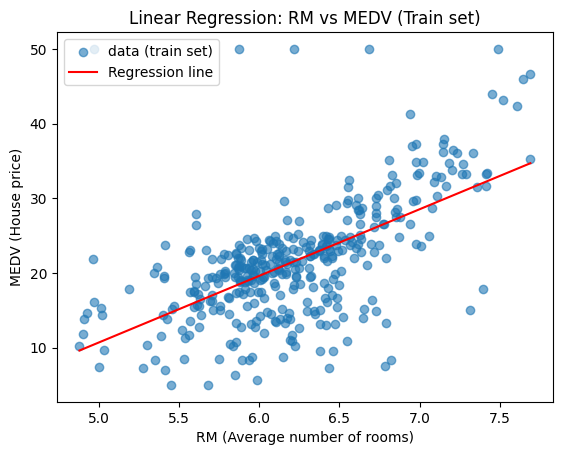

In [ ]:
sorted_idx_train = x_train['RM'].argsort() # 오름차순으로 설정하여 회귀 선 깔끔하게 표현

plt.scatter(x_train, y_train, label='data (train set)', alpha=0.6)
plt.plot(x_train.iloc[sorted_idx_train], y_train_pred[sorted_idx_train], color='red', label='Regression line')

plt.xlabel('RM (Average number of rooms)')
plt.ylabel('MEDV (House price)')
plt.title('Linear Regression: RM vs MEDV (Train set)')
plt.legend()
plt.show()

- test data

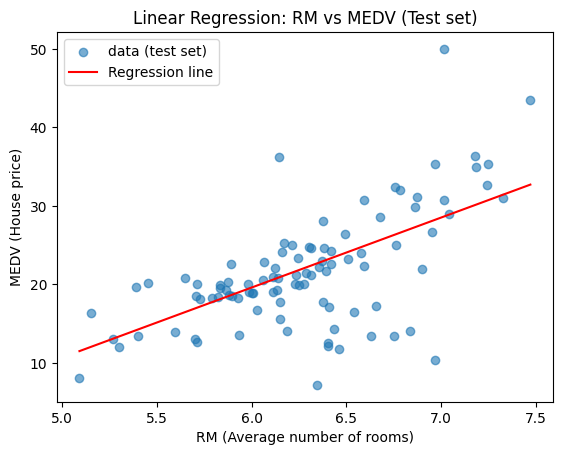

In [ ]:
sorted_idx_test = x_test['RM'].argsort()

plt.scatter(x_test, y_test, label='data (test set)', alpha=0.6)
plt.plot(x_test['RM'].iloc[sorted_idx_test], y_pred[sorted_idx_test], color='red', label='Regression line')

plt.xlabel('RM (Average number of rooms)')
plt.ylabel('MEDV (House price)')
plt.title('Linear Regression: RM vs MEDV (Test set)')
plt.legend()
plt.show()

#### **성능 평가**

- 평가 지표 계산

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

In [ ]:
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)

- 성능이 비슷하여 overfitting 없이 모델이 안정적임을 알 수 있음

In [ ]:
print(f"R² score : {r2_train:.4f}")
print(f"RMSE     : {rmse_train:.4f}")
print(f"MAE      : {mae_train:.4f}")

R² score : 0.3727
RMSE     : 6.2457
MAE      : 4.2144


In [ ]:
print(f"R² score : {r2_test:.4f}")
print(f"RMSE      : {rmse_test:.4f}")
print(f"MAE       : {mae_test:.4f}")

R² score : 0.3806
RMSE      : 5.8190
MAE       : 3.9691


### **-**

In [ ]:
crim_x = df[['CRIM']] # 2D
temp_y = df['MEDV']

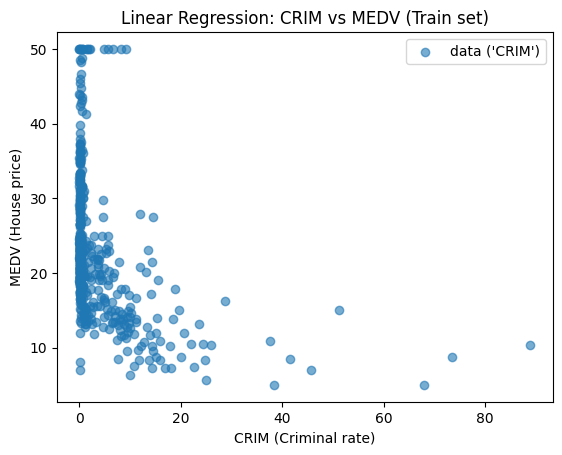

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(crim_x, temp_y, label='data (\'CRIM\')', alpha=0.6)

# 범죄율과 집 값 간 상관관계를 시각화해서 보려했는데 관계가 없었음
# 즉, 범죄율이 낮다고해서 집 값이 무조건 낮은 게 아님

plt.xlabel('CRIM (Criminal rate)')
plt.ylabel('MEDV (House price)')
plt.title('Linear Regression: CRIM vs MEDV (Train set)')
plt.legend()
plt.show()